In [2]:
import pandas as pd
import json
import requests

In [4]:

offset = 0
nft_data = {'assets':[]}

while True:
    
    url = "https://api.opensea.io/api/v1/assets?"
    params = {
        'offset' : offset,
        'limit': 50
    }

    headers = {"X-API-KEY": KEY}

    response = requests.request("GET", url, headers=headers, params=params)
    nft_data['assets'].extend(response.json()['assets'])
    
    offset += 50
    
    if len(nft_data['assets']) > 10050:
        break

In [ ]:
# from pandas.io.json import json_normalize

In [ ]:
df_1 = pd.DataFrame(nft_data_2['assets'])

In [5]:
nft_data_3 = {'assets':[]}
for offset in range(0,10050,50):
    url = "https://api.opensea.io/api/v1/assets?"
    params = {
        'offset' : offset,
        'order_direction':'desc',
        'limit': 50
    }

    headers = {"X-API-KEY": KEY}

    response = requests.request("GET", url, headers=headers, params=params)
    nft_data_3['assets'].extend(response.json()['assets'])

In [6]:
df_a = json_normalize(nft_data_3['assets'], max_level=4)

In [7]:
df_2 = pd.DataFrame(nft_data_3['assets'])

In [8]:
df_2.to_csv('nft_asset2_list.csv')

In [ ]:
assets_3.to_csv('nft_sale_count.csv')

In [4]:
list_of_asset_dfs_3 = []
for offset in range(0,10050,50):
    url = "https://api.opensea.io/api/v1/assets"
    querystring = {"order_by":"sale_count",
                   "order_direction":"asc",
                   "offset":f"{offset}",
                   "limit":"50"}
    headers = {"X-API-KEY": "9aded185f80d49e3b8b2ecb096e9b8c1"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    json = response.json()
    df = json_normalize(json['assets'], max_level=4)
    list_of_asset_dfs_3.append(df)
#     print(f"Offset is {offset} and {len(df)} assets added")
assets_4 = pd.concat([df for df in list_of_asset_dfs_3], ignore_index = True, sort=False)

In [5]:
assets_4.to_csv('nft_sale_count2.csv')

In [3]:
from pandas import json_normalize

In [ ]:
# sorting by sale date

In [1]:
list_of_asset_dfs_4 = []
for offset in range(0,10050,50):
    url = "https://api.opensea.io/api/v1/assets"
    querystring = {"order_by":"sale_date",
                   "order_direction":"asc",
                   "offset":f"{offset}",
                   "limit":"50"}
    headers = {"X-API-KEY": KEY}
    re = requests.request("GET", url, headers=headers, params=querystring)
    json = re.json()
#     j_son = json.loads(re)
    df_5 = json_normalize(json['assets'], max_level=4)
    list_of_asset_dfs_4.append(df_5)
assets_5 = pd.concat([df for df in list_of_asset_dfs_4], ignore_index = True, sort=False)
# print("")

In [3]:
# list_of_asset_dfs_9 = []
# for offset in range(0,10050,50):
#     url = "https://api.opensea.io/api/v1/assets"
#     querystring = {"order_by":"sale_price",
#                    "order_direction":"desc", 
#                    "offset":f"{offset}",
#                    "limit":"50"}
#     headers = {"X-API-KEY": "9aded185f80d49e3b8b2ecb096e9b8c1"}
#     response = requests.request("GET", url, headers=headers, params=querystring)
#     json = response.json()
# #     json.loads(js.decode("utf-8")
#     df_4 = json_normalize(json['assets'], max_level=4)
#     list_of_asset_dfs_9.append(df_4)
# assets_9 = pd.concat([df for df in list_of_asset_dfs_9], ignore_index = True, sort=False)
# print("")
# print("")

# list_of_asset_dfs_10 = []
# for offset in range(0,10050,50):
#     url = "https://api.opensea.io/api/v1/assets"
#     querystring = {"order_by":"sale_price",
#                    "order_direction":"asc",
#                    "offset":f"{offset}",
#                    "limit":"50"}
#     headers = {"X-API-KEY": "9aded185f80d49e3b8b2ecb096e9b8c1"}
#     response = requests.request("GET", url, headers=headers, params=querystring)
#     json = response.json()
#     df_b = json_normalize(json['order_by'], max_level=4)
#     list_of_asset_dfs_10.append(df_b)
# assets_10 = pd.concat([df for df in list_of_asset_dfs_10], ignore_index = True, sort=False)

In [25]:
nft_assets = pd.concat([assets_3, assets_4], ignore_index=True, sort=False)

<AxesSubplot:>

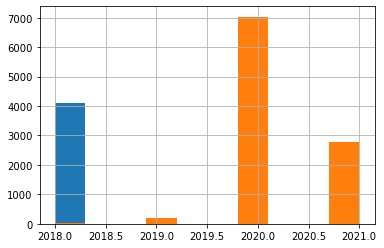

In [26]:
assets_3['asset_contract.created_date'].astype("datetime64").dt.year.hist()
assets_4['asset_contract.created_date'].astype("datetime64").dt.year.hist()

<AxesSubplot:>

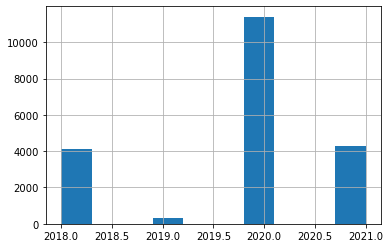

In [27]:
nft_assets['asset_contract.created_date'].astype("datetime64").dt.year.hist()

In [29]:
nft_assets['id'].nunique()

16775

In [30]:
nft_assets['token_id'].nunique()

14461

In [32]:
df_nft = nft_assets.drop_duplicates(subset=['token_id'])

In [34]:
df_nft.to_csv('nftsale.csv')